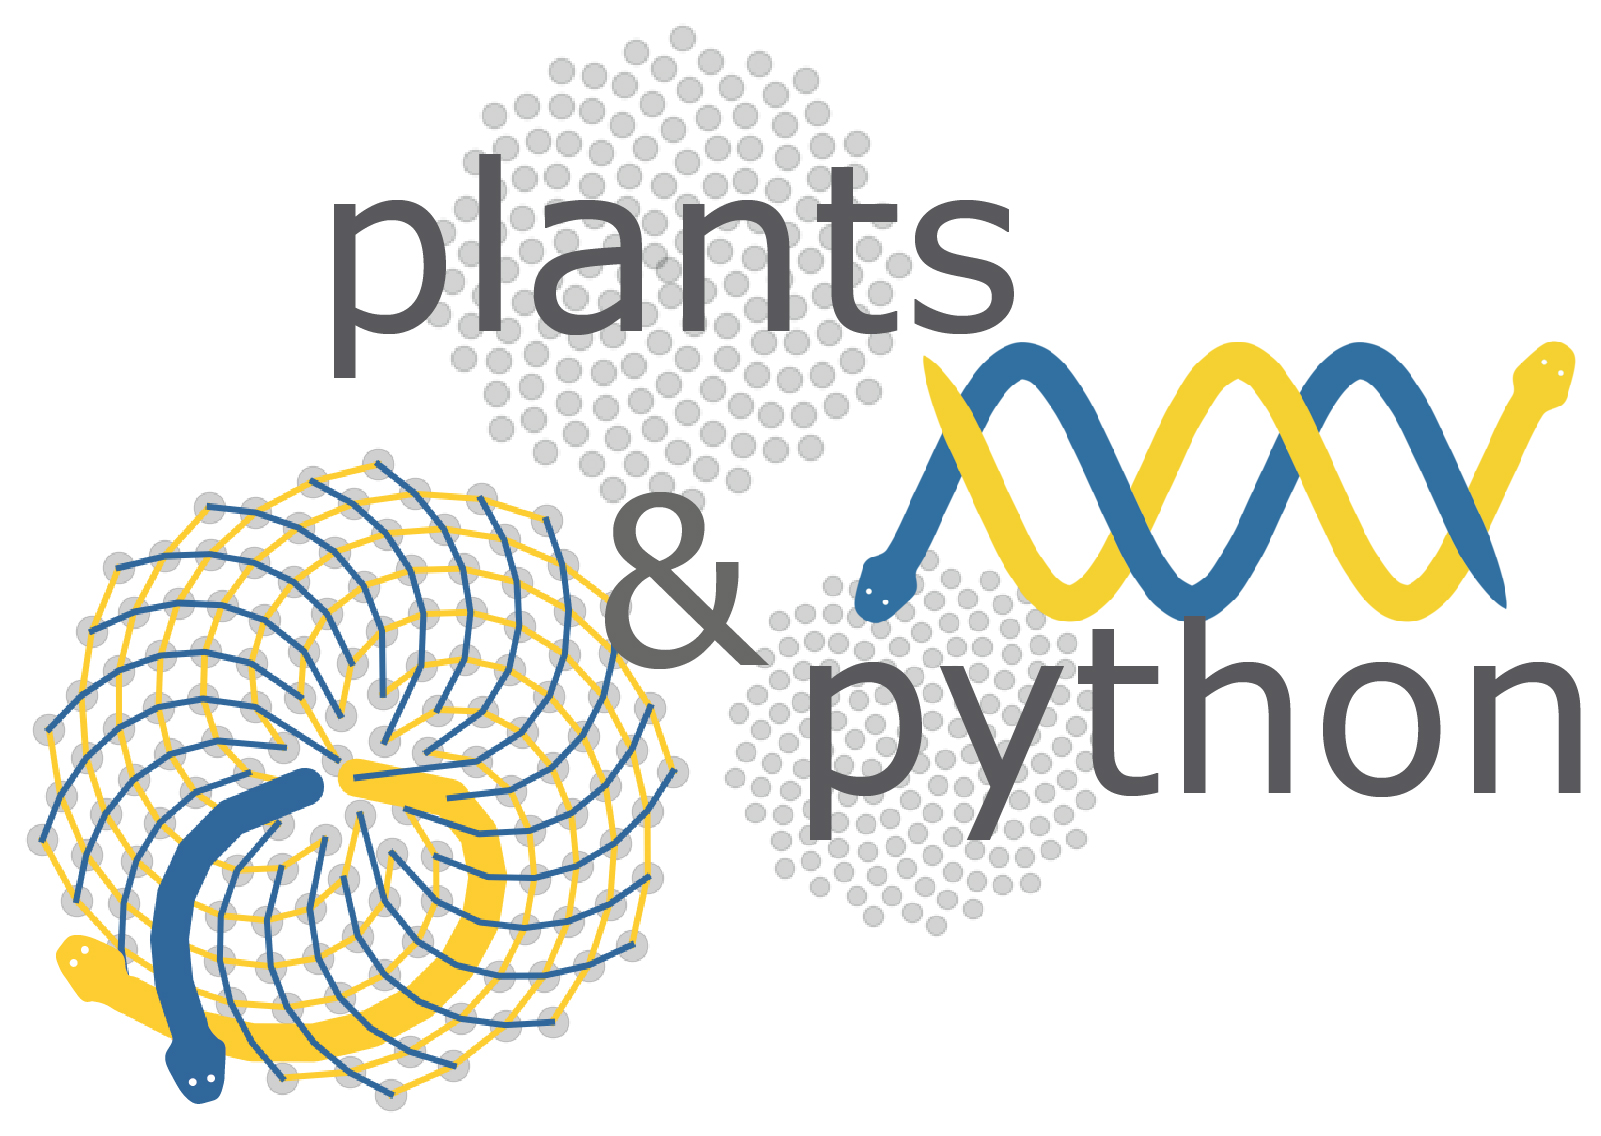

# Practice: Genome visualization and comparative genomics

## Orthology and Gene Family Analysis

Synteny is a good way to identify orthologous genes between species, but sometimes genes move around the genome, and when they are in new places, syntenic approaches are unable to identify orthologous gene pairs. Very distantly related species like rice and moss also have undergone massive strucutral rearrangements and polyploidy, so many of the genes are no longer in the same places. Alternatively, we can cluster similar groups of genes into gene families or **orthogroups**. Here, we essentially use BLAST and set a threshold to group genes together based on similarity. Orthogroup analysis is a powerful way to identify corresponding genes across dozens of different species. This can be used to assign function or to identify gene losses or expansions related to important traits. 
<br>
We will use OrthoFinder to compare the gene content of 56 divere flowering plant genomes.
https://github.com/davidemms/OrthoFinder
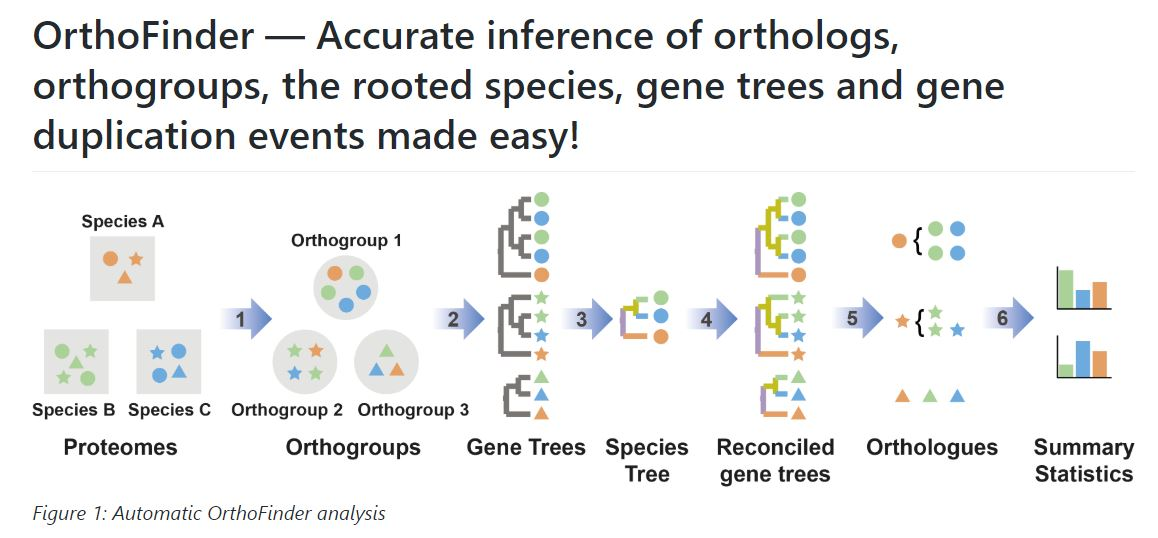

OrthoFinder can be used to cluster genes into orthogroups for any number of species and typcially, more species = more power. The input for OrthoFinder is a set of protein sequences in fasta format for each species. OrthoFinder is computationally intensive (All vs all alignment + phylogenetic tree construction), so we ran this already on a set of 56 species (see below). I have provided an example submission script on HPCC if you'd like to run it yourself!

## Challenge problem: Run OrthoFinder on a group of your favorite species!

I have provided orthofinder results for a group of ~21 species, but you can run Orthofinder on a different set of species of your choosing. Orthofinder is relatively CPU intensive, but this depends on the number of species you include in the analysis and the total number of genes. <br>

I put an example  slurm submission script for Orthofinder under `/mnt/ufs18/rs-007/REU_Plant_Genome_2021/Orthofinder` as follows:

    #!/bin/sh --login
    #SBATCH --time=96:00:00             # limit of wall clock time - how long the job will run (same as -t)
    #SBATCH --nodes=1                 # number of different nodes - could be an exact number or a range of nodes (same as -N)
    #SBATCH --ntasks=8                 # number of tasks - how many tasks (nodes) that you require (same as -n)
    #SBATCH --cpus-per-task=1           # number of CPUs (or cores) per task (same as -c)
    #SBATCH --mem-per-cpu=4g            # memory required per allocated CPU (or core) - amount of memory (in bytes)
    #SBATCH -J Orthofinder
    cd /mnt/ufs18/rs-007/REU_Plant_Genome_2021/Orthofinder/

    module purge
    module load iccifort/2019.5.281  impi/2018.5.288
    module load OrthoFinder/2.4.1-Python-3.7.4

    orthofinder -t 8 -a 8 -b /mnt/ufs18/rs-034/VanBuren_Lab/Bob/ -f /mnt/ufs18/rs-007/REU_Plant_Genome_2021/Orthofinder/Proteins_seqs/

Here, I have requested 1 node with 8 cpus to run orthofinder. I have only included protein datasets from 8 species (under `/mnt/ufs18/rs-007/REU_Plant_Genome_2021/Orthofinder/Proteins_seqs/`), so this should run in a reasonable amount of time with these resources. I would typically request 96 processors, but this should be fine. I have requested a wall time of 96 hours and 4 Gb of memory per node. We need to load a few modules including the Intel compilers toolchain and Intel MPI Library, which are useful to create, maintain, and test advanced programs on high performance computing clusters. We will also load Orthofinder version 2.41 and specify the correct version of Python to run. We could also install OrthoFinder locally ourselves using a conda virtual environment, but we won't get into that here. **If you decide to run Orthofinder yourself, make sure to change the starting directory and the -b flag in the command, as this controls where the files will be output. DO NOT OUTPUT THEM IN THE COURSE DIRECTORY**
<br>
If you want to run orthofinder of different/additional species, you simply need to download the protein file and include it in the directory containing protein sequences. 

In [ ]:
## Answer
## What species did you choose and what do the output files look like? 

We will use the output files you generated or the ones I provided for the remainder of this exercise. 

## Phylogenetics with Bio.Phylo

Orthofinder builds a consensus phylogenetic tree based on all of the individual gene trees it constructs for each orthogroup. We can visualize this tree using the Biopython function `Phylo`. This will give us a sense of the phylogenetic placement of the species we included. First, we need to import a few functions in Biopython as well as matplotlib: 

In [1]:
import copy
from io import StringIO

from Bio import Phylo
from Bio.Phylo.Applications import PhymlCommandline
from Bio.Phylo.PAML import codeml
from Bio.Phylo.PhyloXML import Phylogeny
%matplotlib inline

There are more powerful things that can be done with `Phylo` , but for now, we will simply read the tree file output from OrthoFinder and plot it. 
<br>
<br>
**Note: Remember to provide the path for the species tree file!**

In [2]:
tree = Phylo.read("Practice9_SpeciesTree_rooted_node_labels.txt", "newick") ## specify the location of the tree file and the format (in this case, newick)

Printing the tree object as a string gives us a look at the entire object hierarchy.

In [3]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(name='N0')
        Clade(branch_length=0.155854, name='A_trichopoda')
        Clade(branch_length=0.155854, name='N1')
            Clade(branch_length=0.0606656, name='N2')
                Clade(branch_length=0.228865, name='M_acuminata')
                Clade(branch_length=0.16245, name='N4')
                    Clade(branch_length=0.0263692, name='N7')
                        Clade(branch_length=0.152926, name='O_sativa')
                        Clade(branch_length=0.0448504, name='N11')
                            Clade(branch_length=0.0899464, name='B_distachyon')
                            Clade(branch_length=0.0623047, name='N18')
                                Clade(branch_length=0.021327, name='T_aestivum')
                                Clade(branch_length=0.0322549, name='H_vulgare')
                    Clade(branch_length=0.0475285, name='N8')
                        Clade(branch_length=0.0375789, name='N12')
                      

The Tree object contains global information about the tree, such as whether it’s rooted or unrooted. It has one root clade, and under that, it’s nested lists of clades all the way down to the tips.

It's hard to draw meaning from this, but we can draw the tree in a more informative way. The function draw_ascii creates a simple ASCII-art (plain text) dendrogram. This is a convenient visualization for interactive exploration, in case better graphical tools aren’t available.

In [4]:
Phylo.draw_ascii(tree)

  _____________ A_trichopoda
 |
 |                    _____________________ M_acuminata
 |                   |
 |                   |                  ______________ O_sativa
 |                   |                _|
 |              _____|               | |     _______ B_distachyon
 |             |     |               | |____|
 |             |     |               |      |     __ T_aestivum
_|             |     |               |      |____|
 |             |     |_______________|           |___ H_vulgare
 |             |                     |
 |             |                     |        ___ S_bicolor
 |             |                     |    ___|
 |             |                     |   |   |_______ Z_mays
 |             |                     |___|
 |             |                         |   ___________ P_glaucum
 |             |                         |__|
 |             |                            |___ P_virgatum
 |_____________|
               |                  _____________ C_qui

Here we can see we constructed OrthoGroups for 56 flowering plant species across ~20 plant families. See if you can figure out which species are which and read the tree correctly. 

You can also create a slightly nicer graphic using the draw function:

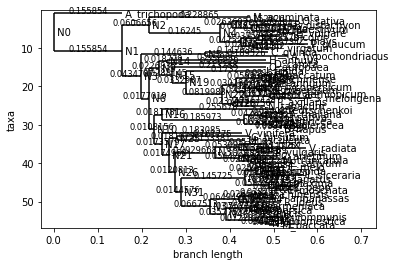

In [5]:
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)

# Analyzing Orthofinder gene family results

Now that we have a good sense of the phylogenetic placement of our species, we can play around with the OrthoFinder results. The primary output of OrthoFinder is a csv file where each row is a different orthogroup and each column is a different species  The numbers correspond to the number of genes in that orthogroup for each species. We can use this to get simple metrics on or more complex dynamics of expansion and contraction of genes in specific lineages. In terms of downstream analyses, you could identify an orthogroup that contains your favorite gene and find the orthologous sequences in all your other species of interest. You could identify expanded or contracted orthogroups in one species and use Gene Ontology terms or other classifiers to see what those duplicated genes are likely involved in. 
<br>
You could also use these orthogroups as common identifiers across species and map expression to each orthogroup (as we did in last year's class porject). 

For simplicity, we will use `pandas` to read in, manipulate, and analyze our dataframe: 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv("Practice9_Orthogroups.GeneCount.csv")
data.head()

,Orthogroup,A_hypochondriacus,A_thaliana,A_trichopoda,B_distachyon,B_hispida,B_juncea,B_napus,B_oleracea,C_annuum,...,R_ideus,S_aethiopicum,S_bicolor,S_melongena,S_tuberosum,T_aestivum,V_radiata,V_vinifera,Z_mays,Total
0,OG0000000,0,0,0,0,0,0,0,0,0,...,0,16,0,12967,0,0,0,0,0,12989
1,OG0000001,0,2,13,0,12,19,1,0,66,...,5,29,0,4560,62,0,6,1,6,6079
2,OG0000002,38,6,4,3,7,26,22,10,129,...,132,85,2,66,74,5,22,9,1,3690
3,OG0000003,1,41,17,0,24,71,113,39,73,...,42,16,0,75,60,0,19,44,0,3215
4,OG0000004,8,33,1,25,18,62,106,47,60,...,84,22,33,39,51,132,30,46,22,3102


### How many total orthogroups are there for this dataset?

In [11]:
## Answer, use the .shape function in pandas
data.shape

(86185, 58)

### Which species has the most genes in orthogroups? 

In [14]:
## Answer
data.sum()
# T_aestivum has the most with 105360

Orthogroup           OG0000000OG0000001OG0000002OG0000003OG0000004O...
A_hypochondriacus                                                22637
A_thaliana                                                       26544
A_trichopoda                                                     22887
B_distachyon                                                     29464
B_hispida                                                        23632
B_juncea                                                         76300
B_napus                                                          94673
B_oleracea                                                       42519
C_annuum                                                         35475
C_arietinum                                                      23221
C_baccatum                                                       35153
C_chinense                                                       34482
C_lanatus                                                        20486
C_maxi

### Which orthogroup has the most genes in it (across all species)?

In [16]:
## Answer
totalCol = data['Total']
totMax = totalCol.max()
totMaxInd = totalCol[totalCol == totMax]
totMaxInd

0    12989
Name: Total, dtype: int64

### Which species has the most orthogroups with 0 genes? Why do you think that is? 

In [17]:
## Answer
print(data[data == 0].count(axis=0))

Orthogroup               0
A_hypochondriacus    74086
A_thaliana           72622
A_trichopoda         73672
B_distachyon         71801
B_hispida            73367
B_juncea             67940
B_napus              64882
B_oleracea           69189
C_annuum             71577
C_arietinum          74845
C_baccatum           72291
C_chinense           71630
C_lanatus            73953
C_maxima             72963
C_melo               73270
C_moschata           72858
C_pepo               74158
C_quinoa             73578
C_sativa             69328
D_carota             73673
F_annanassas         67763
G_hirsutum           71986
G_max                72225
H_annuus             71938
H_vulgare            71711
I_trifida            73655
K_fedtschenkoi       73796
L_lycopersicum       72444
L_siceraria          74080
M_acuminata          74188
M_baccata            70365
M_domestica          71040
M_esculenta          73686
M_truncatula         71256
N_tabacum            71286
O_europaea           72841
O

### Bonus challenge: Plot the distribution of orthogroup size 

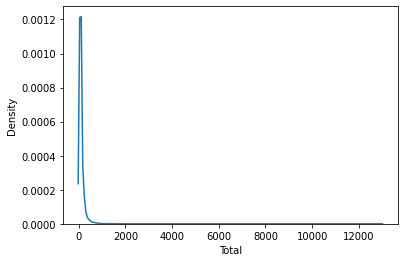

In [18]:
## Answer
import seaborn as sns
sns.kdeplot(totalCol)

### BONUS challenge 2X: Identify orthogroups that are expanded in one species of your choice. This can be simply based on some cutoff, or preferably, using a statistical test. 

In [ ]:
## Answer